In Class Assignment, Group Members: Simone Gable, Chloe Herman

In [13]:
import requests
import pandas
import lxml
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [14]:
countrydata = []
kmAreadata = []
miAreadata = []
populationdata = []
result = requests.get("https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population_density")
content = result.content
soup = BeautifulSoup(content, 'html.parser')
table = soup.table
table_rows = table.find_all('tr')
for tr in table_rows:
    td = tr.find_all('td')
    if len(td) > 1:
        country = td[1]
        countrystring = str(country.text)
        countrystring = countrystring.strip()
        kmArea = td[2]
        kmAreaString = str(kmArea.text).strip()
        kmAreaString = kmAreaString.replace(',', '')
        kmAreaInt = float(kmAreaString)
        miArea = td[3]
        miAreaString = str(miArea.text).strip()
        miAreaString = miAreaString.replace(',', '')
        miAreaInt = float(miAreaString)
        pop = td[4]
        popString = str(pop.text).strip()
        popString = popString.replace(',', '')
        popInt = float(popString)
        if countrystring != "World (land only, excluding Antarctica)" and countrystring != "World (land only)" :
            countrydata.append(countrystring)
            kmAreadata.append(kmAreaInt)
            miAreadata.append(miAreaInt)
            populationdata.append(popInt)
country_DF = pandas.DataFrame(
    {
        'Country': countrydata,
        'Area(km)': kmAreadata,
        'Area(mi)' : miAreadata,
        'Population' : populationdata

    }
)

In [15]:
country_DF.head()

,Country,Area(km),Area(mi),Population
0,Macau (China),115.30,45.00,696100.0
1,Monaco,2.02,0.78,38300.0
2,Singapore,722.50,279.00,5703600.0
3,Hong Kong (China),1106.00,427.00,7500700.0
4,Gibraltar (United Kingdom),6.80,2.60,33701.0


In [16]:
country_DF[["Area(km)", "Area(mi)", "Population"]].describe()

,Area(km),Area(mi),Population
count,2.510000e+02,2.510000e+02,2.510000e+02
mean,5.432938e+05,2.097769e+05,3.047293e+07
std,1.716009e+06,6.625517e+05,1.283047e+08
min,4.900000e-01,1.900000e-01,5.600000e+01
25%,1.590200e+03,6.740000e+02,2.638290e+05
50%,6.456200e+04,2.492800e+04,4.475353e+06
75%,3.495840e+05,1.349750e+05,1.764158e+07
max,1.712524e+07,6.612093e+06,1.405181e+09


In [17]:
country_DF.agg({"Area(km)": ['min', 'max', 'median', 'mean', 'std'], "Area(mi)": ['min', 'max', 'median', 'mean', 'std'], "Population": ['min', 'max', 'median', 'mean', 'std']})

,Area(km),Area(mi),Population
min,4.900000e-01,1.900000e-01,5.600000e+01
max,1.712524e+07,6.612093e+06,1.405181e+09
median,6.456200e+04,2.492800e+04,4.475353e+06
mean,5.432938e+05,2.097769e+05,3.047293e+07
std,1.716009e+06,6.625517e+05,1.283047e+08


In [18]:
country_DF.corr(method = 'pearson')

,Area(km),Area(mi),Population
Area(km),1.00000,1.000000,0.459150
Area(mi),1.00000,1.000000,0.459149
Population,0.45915,0.459149,1.000000


In [19]:
country_DF.corr(method = 'kendall')

,Area(km),Area(mi),Population
Area(km),1.000000,0.996860,0.684123
Area(mi),0.996860,1.000000,0.681468
Population,0.684123,0.681468,1.000000


In [20]:
col_1 = country_DF["Area(km)"]
col_2 = country_DF["Area(mi)"]
col_3 = country_DF["Population"]
corr_1 = col_1.corr(col_2)
corr_2 = col_1.corr(col_3)
corr_3 = col_2.corr(col_3)
print("Correlation between Area(km) and Area (mi)", corr_1)
print("Correlation between Area(km) and Population", corr_2)
print("Correlation between Area (mi) and Population", corr_3)

Correlation between Area(km) and Area (mi) 0.9999999713859572
Correlation between Area(km) and Population 0.4591503330197717
Correlation between Area (mi) and Population 0.4591489129941512


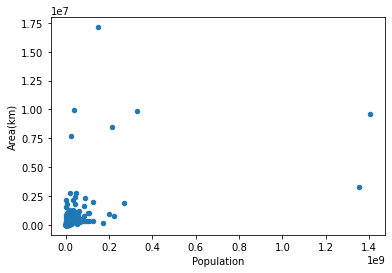

In [21]:
country_DF.plot.scatter(x='Population', y ='Area(km)')